## Gymnasium - An API standard for reinforcement learning with a diverse collection of reference environments

Documents: https://gymnasium.farama.org/introduction/train_agent/

Gymnasium is a project that provides an API (application programming interface) for all single agent reinforcement learning environments, with implementations of common environments: cartpole, pendulum, mountain-car, mujoco, atari, and more.

# Stable Baselines3 - Training, Saving and Loading

Github Repo: [https://github.com/DLR-RM/stable-baselines3](https://github.com/DLR-RM/stable-baselines3)


[RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo) is a training framework for Reinforcement Learning (RL), using Stable Baselines3.

It provides scripts for training, evaluating agents, tuning hyperparameters, plotting results and recording videos.

Documentation is available online: [https://stable-baselines3.readthedocs.io/](https://stable-baselines3.readthedocs.io/)

Examples with Collab Code: [https://stable-baselines3.readthedocs.io/en/master/guide/examples.html](https://stable-baselines3.readthedocs.io/en/master/guide/examples.html)



# 1. Open a Terminal and install the following packages:

sudo apt-get install build-essential python-dev-is-python3 swig python3-pygame git

# 2. autoformatting and install box2d-py and stable-baselines3

In [1]:
# for autoformatting
# %load_ext jupyter_black


In [2]:
# Use pip to install box2d-py and stable-baselines3[extra] which required >= 2.0.0a4
# and gymnasium[other] which includes pymovie

!pip install box2d-py
!pip install "stable-baselines3[extra]>=2.0.0a4" "gymnasium[other]"


## Import policy, RL agent and create directories

In [3]:
# import libaries: gymnasium, numpy, stable_baselines3 and stable_baselines3.common.callbacks

import gymnasium as gym
import numpy as np

from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import CheckpointCallback


In [5]:
# Create directories for models, videos and tb_logs

import os

model_dir = "models/dqn_lunar"
video_final_dir = "videos/final"
video_progress_dir = "videos/progress"
log_dir = "tb_logs"

os.makedirs(model_dir, exist_ok=True)
os.makedirs(video_final_dir, exist_ok=True)
os.makedirs(video_progress_dir, exist_ok=True)
os.makedirs(log_dir, exist_ok=True)

## Create the Gym env and instantiate the agent

For this example, we will use Lunar Lander environment.

"Landing outside landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt. Four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine. "

Lunar Lander environment: [https://gymnasium.farama.org/environments/box2d/lunar_lander/](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

![Lunar Lander](https://cdn-images-1.medium.com/max/960/1*f4VZPKOI0PYNWiwt0la0Rg.gif)


We chose the MlpPolicy because input of Lunar Lander is a feature vector, not images.

The type of action to use (discrete/continuous) will be automatically deduced from the environment action space



In [6]:
# Create env for evaluation and record a video
#   Save video progress in directory: video_proress_dir
#   Save the first video for the first episode
eval_env = gym.make("LunarLander-v3", render_mode="rgb_array")
eval_env = gym.wrappers.RecordVideo(
    eval_env, 
    video_folder=video_progress_dir, 
    episode_trigger=lambda ep: ep==0
)

# Create a DQN model for evaluation using the following parameters:
eval_model = DQN(
    "MlpPolicy",
    eval_env,
    verbose=1,
    exploration_final_eps=0.1,
    target_update_interval=250,
    tensorboard_log=log_dir,
)

/home/christung/Python-Crash-course-for-RL-Beginners/.venv/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/christung/Python-Crash-course-for-RL-Beginners/videos/progress folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


We load a helper function to evaluate the agent:

In [7]:
# import a helper function: evaluate_policy to evaluate the policy

from stable_baselines3.common.evaluation import evaluate_policy

Let's evaluate the un-trained agent, this should be a random agent.

In [8]:
# Before training, how agent is performed and its mean of rewards and std of rewards

# print out its mean of rewards and std of rewards and video saved in video_dir

mean_reward, std_reward = evaluate_policy(
    eval_model,
    eval_env,
    n_eval_episodes=1,
    deterministic=True,
    render=False,
)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/home/christung/Python-Crash-course-for-RL-Beginners/.venv/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward=-680.65 +/- 0.0


## Train the agent and save it

1. Create an env 
2. Record video 
3. Create DQN model
4. Record the result very 10000 steps
5. RL 100,000 (1e5)
6. Save the final result

Warning: this may take a while

In [8]:
# Trigger video creation every 50 episode
def episode_trigger(ep):
    return ep % 50 == 0

# Create an env and record video
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env, 
    video_folder=video_progress_dir, 
    episode_trigger=episode_trigger
)

# Create a DQN model

model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    exploration_final_eps=0.1,
    target_update_interval=250,
    tensorboard_log=log_dir,
)

# Save the checkpoint every 10000 steps
checkpoint_callback = CheckpointCallback(
    save_path="models/dqn_lunar",
    save_freq=10000,
    name_prefix="dqn_lunar",
)
# Start training the agent with timesteps of 100000, using checkpoint callback and setting tensorboard log name to "dqn_lunar"

model.learn(total_timesteps=int(1e5), callback=checkpoint_callback, tb_log_name=log_dir)

# Save the agent optionally
model.save("dqn_lunar_final")

# delete trained model to demonstrate loading
del model  

/home/christung/Python-Crash-course-for-RL-Beginners/.venv/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/christung/Python-Crash-course-for-RL-Beginners/videos/progress folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to tb_logs/tb_logs_5
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.2     |
|    ep_rew_mean      | -150     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 122      |
|    time_elapsed     | 2        |
|    total_timesteps  | 361      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.68     |
|    n_updates        | 65       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | -179     |
|    exploration_rate | 0.934    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 195      |
|    time_elapsed     | 3        |
|    total_timesteps  | 735      |
| 

## Load the trained agent

In [9]:
# load a specific checkpoint file dqn_lunar_final.zip

load_model = DQN.load("dqn_lunar_final")

In [10]:
# Create evaluation env and create a video using RecordVideo wrapper

eval_env = gym.make("LunarLander-v3", render_mode="rgb_array")
eval_env = gym.wrappers.RecordVideo(eval_env, video_folder=video_final_dir, episode_trigger=lambda ep: ep==0)


/home/christung/Python-Crash-course-for-RL-Beginners/.venv/lib/python3.12/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /home/christung/Python-Crash-course-for-RL-Beginners/videos/final folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [11]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(load_model, eval_env, n_eval_episodes=1, deterministic=True, render=False)

# change n_eval_episodes to > 1

# print out the mean of rewards and std of rewards after training
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

mean_reward=-122.13 +/- 0.0


In [ ]:
# close the environment

eval_env.close()

: 

## ==============================================
## Final Task 1: If time is allowed, increase the training frequency such that the mean_reward score can go up to 100+ mark. Can you tell how many times you need to train the model ?

## Final Task 2: Try different Algorithm.
https://stable-baselines3.readthedocs.io/en/master/guide/algos.html

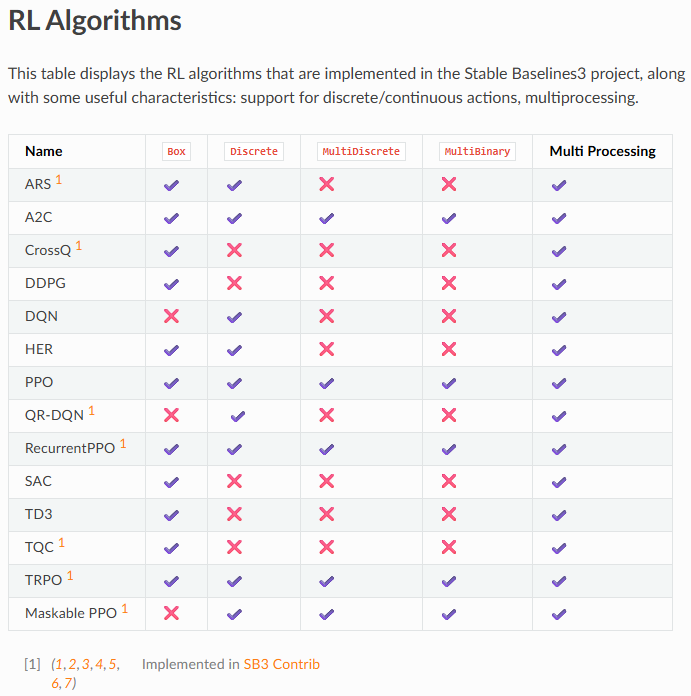